# 1. Read the Data

In [1]:
# Import libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

warnings.filterwarnings('ignore')

# Read the csv file using read_csv method of pandas
data = pd.read_csv('jpm_and_bac_price_2019.csv', index_col=0)
data.tail().round(2)

,BAC Close,Observed JPM,Predicted JPM_BAC
Date,,,
23-12-2019,35.17,137.20,137.44
24-12-2019,35.22,137.58,137.65
26-12-2019,35.52,139.04,138.92
27-12-2019,35.35,139.14,138.20
30-12-2019,35.15,138.63,137.36


# 2. Calculate R-squared

In [2]:
r_sq = 1 - ((data['Observed JPM']-data['Predicted JPM_BAC']) ** 2).sum()/((
    data['Observed JPM'] - data['Observed JPM'].mean()) ** 2).sum()
print('The R-squared is %.2f' % r_sq)

The R-squared is 0.82


In [3]:
from sklearn.metrics import r2_score
r_sq = r2_score(data['Observed JPM'], data['Predicted JPM_BAC'])
print('The R-squared is %.2f' % r_sq)

The R-squared is 0.82


In [4]:
data_nestle = pd.read_csv('predicted_jpm_and_nestle_price_2019.csv', index_col=0)
data_nestle.tail().round(2)

,Observed JPM,Nestle Close,Predicted JPM_Nestle
Date,,,
23-12-2019,137.20,108.80,120.21
24-12-2019,137.58,108.59,120.05
26-12-2019,139.04,108.71,120.14
27-12-2019,139.14,108.98,120.34
30-12-2019,138.63,107.85,119.49


In [5]:
r_sq = r2_score(data_nestle['Observed JPM'], data_nestle['Predicted JPM_Nestle'])
print('The R-squared is %.2f' % r_sq)

The R-squared is 0.35


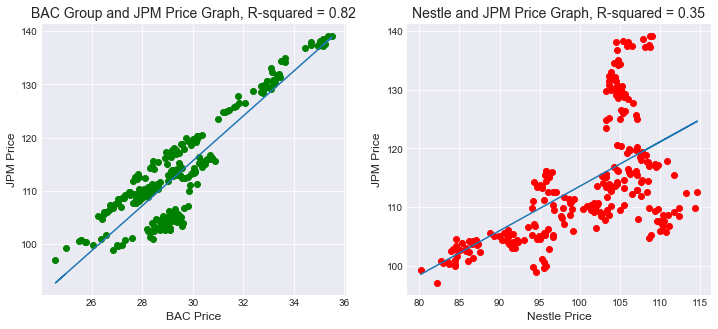

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot of JPM Price vs BAC Price
ax1.scatter(data['BAC Close'], data['Observed JPM'], color="green")
ax1.plot(data['BAC Close'], data['Predicted JPM_BAC'])
# Set title and labels for the plot
ax1.set_title('BAC Group and JPM Price Graph, R-squared = %.2f' %r2_score(
    data['Observed JPM'], data['Predicted JPM_BAC']), fontsize=14)
ax1.set_xlabel('BAC Price', fontsize=12)
ax1.set_ylabel('JPM Price', fontsize=12)


# Plot of JPM Price vs Nestle Price
ax2.scatter(data_nestle['Nestle Close'], data_nestle['Observed JPM'], color="red")
ax2.plot(data_nestle['Nestle Close'], data_nestle['Predicted JPM_Nestle'])
# Set title and labels for the plot
ax2.set_title('Nestle and JPM Price Graph, R-squared = %.2f' %r2_score(
    data_nestle['Observed JPM'], data_nestle['Predicted JPM_Nestle']), fontsize=14)
ax2.set_xlabel('Nestle Price', fontsize=12)
ax2.set_ylabel('JPM Price', fontsize=12)

plt.show()